<a href="https://colab.research.google.com/github/yunmiaouwu/data-245-project/blob/main/DA245_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shared drives/Data245/Project

/content/drive/Shared drives/Data245/Project


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from keras.preprocessing.image import img_to_array

In [ ]:
# unzip

!pip install unrar
!unrar x data.rar '/content/drive/Shared drives/Data245/Project/Data'

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp1312.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13125.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13128.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13130.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13133.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13137.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13138.jpg      28%  OK 
Extracting  /content/drive/Shared drives/Data245/Project/Data/extracted_images/2/exp13144.jpg      28%  OK 
Extracting  /c

In [ ]:
#original image instance
import cv2
from keras.preprocessing.image import img_to_array
i=0
original_image=[]
path = r'/content/drive/Shared drives/Data245/Project/Data/extracted_images/1/1_2.jpg'
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image.append(img_to_array(img))


#reduced image instance
reduced_image=[]
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    
# Data Reduction: PCA
blue,green,red = cv2.split(img)
df_blue,df_green,df_red = blue,green,red
pca_b = PCA(n_components=30)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=30)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=30)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
blue_arr = pca_b.inverse_transform(trans_pca_b)
green_arr = pca_g.inverse_transform(trans_pca_g)
red_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced= (cv2.merge((blue_arr, green_arr, red_arr)))
resized_image = img_reduced.astype('float32') / 255
reduced_image.append(img_to_array(resized_image))


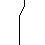

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


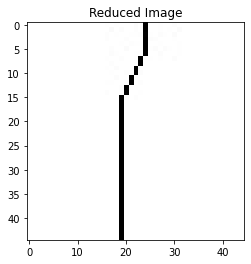

In [ ]:
fig = plt.figure() 

from google.colab.patches import cv2_imshow
img = cv2.imread(path)
# Output img with window name as 'image'
cv2_imshow(img)


plt.title("Reduced Image")
plt.imshow(np.squeeze(reduced_image))
plt.show()

In [ ]:
labels = os.listdir('/content/drive/Shared drives/Data245/Project/Data/extracted_images')
print(labels)

['exists', 'forall', 'in', 'div', 'Delta', 'gamma', 'beta', 'alpha', 'gt', 'infty', 'e', 'i', 'f', 'geq', 'cos', 'ascii_124', 'G', '0', 'int', '6', 'C', 'b', '=', '2', '7', '3', '8', 'H', '4', 'd', 'A', '1', '9', '5', 'forward_slash', '!', '(', ')', '+', ',', '-']


In [ ]:
#number of input in each folder
num = []
Y=[]
for label in labels:
 path = '/content/drive/Shared drives/Data245/Project/Data/extracted_images/{0}/'.format(label)
 folder_data = os.listdir(path)
 k = 0
 for image_path in folder_data:
  k = k+1
  Y.append(label)
 num.append(k)

 print('there are ', k,' images in ', label, 'class')


there are  0  images in  exists class
there are  0  images in  forall class
there are  0  images in  in class
there are  15  images in  div class
there are  0  images in  Delta class
there are  0  images in  gamma class
there are  0  images in  beta class
there are  0  images in  alpha class
there are  0  images in  gt class
there are  0  images in  infty class
there are  0  images in  e class
there are  0  images in  i class
there are  0  images in  f class
there are  0  images in  geq class
there are  0  images in  cos class
there are  0  images in  ascii_124 class
there are  0  images in  G class
there are  6914  images in  0 class
there are  0  images in  int class
there are  3118  images in  6 class
there are  0  images in  C class
there are  0  images in  b class
there are  13104  images in  = class
there are  26141  images in  2 class
there are  2909  images in  7 class
there are  10909  images in  3 class
there are  3068  images in  8 class
there are  0  images in  H class
ther

In [ ]:
#Data Regularization/ Augmentation
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

symbol_temp = np.array(symbol_raw)
aug.fit(symbol_temp)

#fit augented training data to the model
#model.fit(data_gen.flow(x_train, y_train, batch_size=32),...)